In [42]:
import yfinance as yf
import pandas as pd
import numpy as np

In [44]:
btc = yf.download('BTC-USD', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [45]:
eth = yf.download('ETH-USD', start='2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [46]:
new_df = pd.concat((btc['Close'], eth['Close']), axis=1, keys=['btc-close', 'eth-close'])
new_df.head(3)

,btc-close,eth-close
Date,,
2020-12-31,29001.720703,737.803406
2021-01-01,29374.152344,730.367554
2021-01-02,32127.267578,774.534973


In [48]:
new_df['closing-change-btc'] = new_df['btc-close'] - new_df['btc-close'].shift()
new_df['closing-change-eth'] = new_df['eth-close'] - new_df['eth-close'].shift()
new_df['spread'] = new_df['closing-change-btc'] - new_df['closing-change-eth']
new_df['ratio'] = new_df['btc-close'] / new_df['eth-close']
new_df['differential'] = new_df['btc-close'] - new_df['eth-close']
new_df.dropna()
new_df.head()

,btc-close,eth-close,closing-change-btc,closing-change-eth,spread,ratio,differential
Date,,,,,,,
2020-12-31,29001.720703,737.803406,NaN,NaN,NaN,39.308196,28263.917297
2021-01-01,29374.152344,730.367554,372.431641,-7.435852,379.867493,40.218315,28643.784790
2021-01-02,32127.267578,774.534973,2753.115234,44.167419,2708.947815,41.479428,31352.732605
2021-01-03,32782.023438,975.507690,654.755859,200.972717,453.783142,33.605090,31806.515747
2021-01-04,31971.914062,1040.233032,-810.109375,64.725342,-874.834717,30.735338,30931.681030


<AxesSubplot:title={'center':'Ratio'}, xlabel='Date', ylabel='Ratio'>

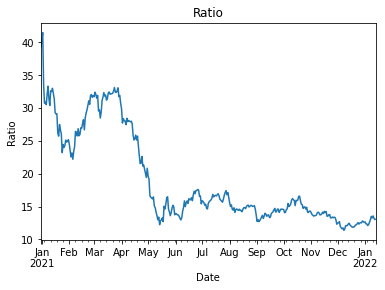

In [49]:
new_df['ratio'].plot(title='Ratio', ylabel='Ratio')

<AxesSubplot:title={'center':'Differential'}, xlabel='Date', ylabel='Differential'>

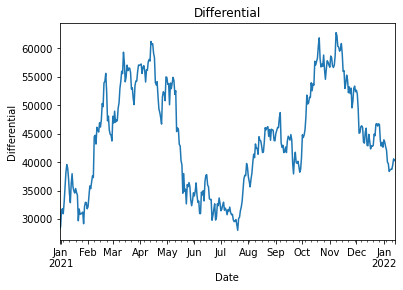

In [50]:
new_df['differential'].plot(title='Differential', ylabel='Differential')

<AxesSubplot:title={'center':'Spread'}, xlabel='Date', ylabel='Spread'>

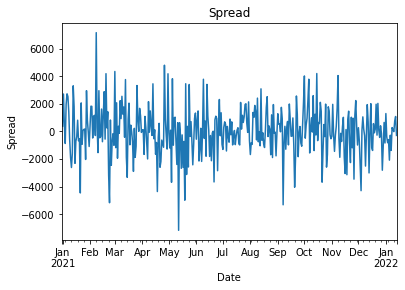

In [51]:
new_df['spread'].plot(title='Spread', ylabel='Spread')

# Observations : 
1.Spread tends to expand when closing-change-btc is positive & closing-change-eth is negative
2.Spread tends to contract when closing-change-btc is positive & closing-change-eth is also positive 
3.Spread tends to move around the x-axis or 0
4.Divergence trade can be taken when spread tries to expand,
Convergence trade can be taken when spread tries to expand